# Getting Started with RDKit

**RDKit** (RD stands for "Rational Drug Design") is an open-source cheminformatics toolkit for working with chemical data.

Key capabilities include:

- **Molecular representation:** Convert chemical names or formulas into machine-readable formats such as SMILES or RDKit Mol objects, and transform 2-D or 3-D structures into data that machine learning (ML) algorithms can process.

- **Feature engineering:** Compute molecular descriptors (like molecular weight) and generate fingerprints that encode each molecule as a fixed-length numerical vector that can be used for regression or classification tasks.

- **Chemical similarity:** Quantify how alike two molecules are using metrics such as the Tanimoto coefficient, enabling tasks like clustering chemical libraries, virtual screening of large databases, and property prediction.

- **Pattern recognition:** Search structures for functional groups or other key motifs, and automatically identify reaction sites or core molecular scaffolds for further analysis.


By mastering RDKit, you'll be able to:  
- Analyze chemical datasets efficiently
- Connect molecular structure to chemical and physical properties
- Build predictive machine learning models for molecular properties

Further reading:
- [RDKit Documentation](https://www.rdkit.org/docs/) - Comprehensive RDKit guide
- [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html) - Practical examples and recipes
- [Greg Landrum's RDKit Blog](https://greglandrum.github.io/rdkit-blog/) - Advanced tutorials and tips


# 1. Installation

If you're working on your local machine, you can install by running:
```bash
pip install rdkit
```
or for conda:
```bash
conda install -c rdkit rdkit
```


In [1]:
# or for Colab:
#!pip install rdkit

Water molecule: O


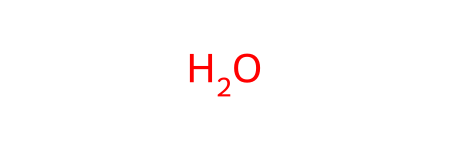

In [2]:
# Import packages
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

# Test installation by printing a simple molecule
water = Chem.MolFromSmiles('O')
print(f"Water molecule: {Chem.MolToSmiles(water)}")

# Test molecule visualization
water 


# 2. Molecular Representations

## SMILES (Simplified Molecular Input Line Entry System)

SMILES encodes a molecule’s structure as a compact line notation, turning a 2-D chemical diagram into a single text string that computers can parse. It represents:
- **Atoms:** Element symbols like C (carbon), N (nitrogen), O (oxygen)
- **Bonds:** Single bonds implicit, double bonds (=), triple bonds (#)
- **Rings:** Numbers mark ring closures so the string can “loop back”
- **Branches:** Parentheses show side chains branching off the main backbone

Some examples of SMILES:
- Water: `O`
- Ethanol: `CCO`
- Benzene: `c1ccccc1`
- Caffeine: `CN1C=NC2=C1C(=O)N(C(=O)N2C)C`

## RDKit Mol Objects

An RDKit **Mol object** is a computer-readable representation of a molecule. It stores the full molecular graphs/atoms and their chemical information.  This goes beyond a plain SMILES string, which is only a line of text. The SMILES format is ideal for storage and quick exchange, but the Mol object is the working format that lets you analyze, manipulate, and calculate properties directly in RDKit.


In [3]:
# Create molecules from SMILES
molecules = {
    'Water': 'O',
    'Methane': 'C',
    'Ethanol': 'CCO',
    'Benzene': 'c1ccccc1',
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
}

# Convert SMILES to RDKit mol objects
mol_objects = {}
for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    mol_objects[name] = mol
    print(f"{name}: {smiles}")


Water: O
Methane: C
Ethanol: CCO
Benzene: c1ccccc1
Caffeine: CN1C=NC2=C1C(=O)N(C(=O)N2C)C


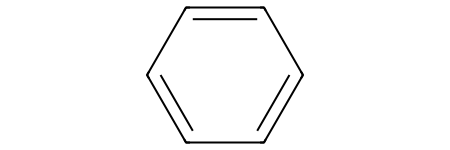

In [4]:
# Display the benzene molecule
mol_objects['Benzene']

In [5]:
# Check some basic molecular properties
benzene = mol_objects['Benzene']

print(f"Number of atoms: {benzene.GetNumAtoms()}")
print(f"Number of bonds: {benzene.GetNumBonds()}")
print(f"Molecular formula: {Chem.rdMolDescriptors.CalcMolFormula(benzene)}")
print(f"Molecular weight: {Descriptors.MolWt(benzene):.2f} g/mol")


Number of atoms: 6
Number of bonds: 6
Molecular formula: C6H6
Molecular weight: 78.11 g/mol


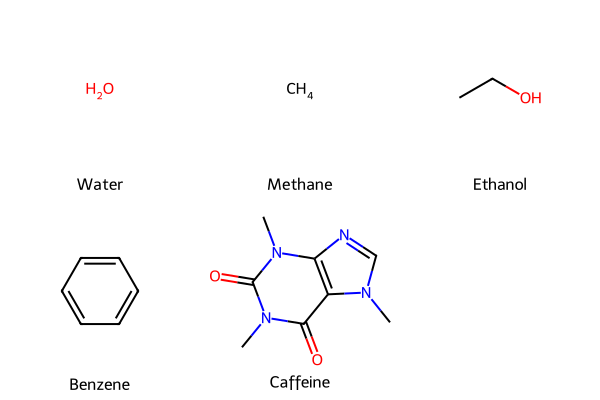

In [6]:
# Visualize multiple molecules in a grid using MolsToGridImage
mol_list = list(mol_objects.values())
names = list(mol_objects.keys())

Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=names, subImgSize=(200, 200))


## SMILES Canonicalization

A single molecule can be written with multiple valid SMILES strings.  
*Canonical SMILES* provide a **unique, standardized representation**, ensuring that the same molecule is always encoded the same way.

Examples of non-canonical SMILES for acetic acid:
- `CC(=O)O`
- `C(C(=O)O)`
- `OC(=O)C`

All represent the same molecule but look different!


In [7]:
# Different SMILES for the same molecule (acetic acid)
acetic_acid_variants = [
    'CC(=O)O',
    'C(C(=O)O)',
    'OC(=O)C'
]

# Convert to mol objects and back to canonical SMILES
canonical_smiles = []
for smiles in acetic_acid_variants:
    mol = Chem.MolFromSmiles(smiles)
    canonical = Chem.MolToSmiles(mol)  # This canonicalizes
    canonical_smiles.append(canonical)
    print(f"Original: {smiles}")
    print(f"Canonical: {canonical}")
    print()


Original: CC(=O)O
Canonical: CC(=O)O

Original: C(C(=O)O)
Canonical: CC(=O)O

Original: OC(=O)C
Canonical: CC(=O)O



In [8]:
# A function to canonicalize SMILES
def canonicalize_smiles(smiles):
    """
    Convert any SMILES to its canonical form.
    
    Args:
        smiles (str): Input SMILES string
        
    Returns:
        str: Canonical SMILES
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Invalid SMILES
    return Chem.MolToSmiles(mol)

# Test canonicalization
test_smiles = ['CCO', 'OCC', 'C(O)C']  # All represent ethanol
for smiles in test_smiles:
    canonical = canonicalize_smiles(smiles)
    print(f"{smiles} --> {canonical}")


CCO --> CCO
OCC --> CCO
C(O)C --> CCO


### Mini Exercise 1

1. Create mol objects for these important chemical engineering molecules:
   - Ethylene: `C=C`
   - Propylene: `CC=C`
   - Toluene: `Cc1ccccc1`

2. Calculate their molecular weights and number of atoms.

3. Canonicalize these SMILES and verify they give the same result:
   - Toluene: `Cc1ccccc1` vs `c1ccc(C)cc1`


In [9]:
# Exercise 1 solution space


# 3. Molecular Descriptors

**Molecular descriptors** are numerical features that quantify molecular properties. They convert molecular structure into vectors that ML algorithms can use.

Some descriptor categories include:
- **Constitutional:** MW, atom counts, bond counts
- **Topological:** Connectivity indices, molecular complexity
- **Physicochemical:** LogP, TPSA, solubility parameters
- **Electronic:** Partial charges, HOMO-LUMO gaps



In [10]:
# Calculate important descriptors for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')

# Constitutional descriptors
mw = Descriptors.MolWt(benzene)
heavy_atoms = benzene.GetNumHeavyAtoms()
h_bond_donors = Descriptors.NumHDonors(benzene)
h_bond_acceptors = Descriptors.NumHAcceptors(benzene)

# Physicochemical descriptors  
logp = Descriptors.MolLogP(benzene)
tpsa = Descriptors.TPSA(benzene)
rotatable_bonds = Descriptors.NumRotatableBonds(benzene)

# Structural descriptors
aromatic_rings = Descriptors.NumAromaticRings(benzene)
rings = Descriptors.RingCount(benzene)

print("Benzene Molecular Descriptors:")
print(f"Molecular Weight: {mw:.2f} g/mol")
print(f"Heavy Atoms: {heavy_atoms}")
print(f"H-bond Donors: {h_bond_donors}")
print(f"H-bond Acceptors: {h_bond_acceptors}")
print(f"LogP: {logp:.2f}")
print(f"TPSA: {tpsa:.2f} Ų")
print(f"Rotatable Bonds: {rotatable_bonds}")
print(f"Aromatic Rings: {aromatic_rings}")
print(f"Total Rings: {rings}")


Benzene Molecular Descriptors:
Molecular Weight: 78.11 g/mol
Heavy Atoms: 6
H-bond Donors: 0
H-bond Acceptors: 0
LogP: 1.69
TPSA: 0.00 Ų
Rotatable Bonds: 0
Aromatic Rings: 1
Total Rings: 1


# 4. Molecular Fingerprints & Similarity

**Molecular fingerprints** encode molecular structure as binary vectors (bit strings). Each bit represents the presence/absence of a specific structural feature.

A common approach is the **Morgan fingerprint**, which encodes circular substructures around each atom. The **radius** controls how many bonds the algorithm explores outward from each atom, while the **length** determines the size of the bit string (typically 1,024 or 2,048 bits). By capturing local chemical environments in this way, Morgan fingerprints provide a consistent numerical description of any molecule.


In [11]:
from rdkit.Chem import rdFingerprintGenerator

# Create Morgan fingerprint generator
# radius=2 means we look 2 bonds away from each atom
# fpSize=2048 means 2048-bit fingerprint
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Generate fingerprint for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')
benzene_fp = morgan_gen.GetFingerprint(benzene)

print(f"Fingerprint length: {benzene_fp.GetNumBits()}")
print(f"Number of bits set: {benzene_fp.GetNumOnBits()}")

# Convert to list to see the first few bits
fp_array = benzene_fp.ToList()
print(f"First 20 bits: {fp_array[:20]}")


Fingerprint length: 2048
Number of bits set: 3
First 20 bits: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


The **Tanimoto coefficient** is then used to compare these fingerprints. This makes it the standard metric for assessing molecular similarity once Morgan fingerprints have been generated. It measures the fraction of shared bits between two molecules relative to the total bits set in either one, giving a score from 0 (no common features) to 1 (identical fingerprints).

In [12]:
from rdkit.DataStructs import TanimotoSimilarity

# Create molecules for similarity comparison
molecules_sim = {
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
    'Theobromine': 'CN1C=NC2=C1C(=O)NC(=O)N2C',    # Similar to caffeine
    'Theophylline': 'CN1C2=C(C(=O)N(C1=O)C)NC=N2', # Similar to caffeine
    'Benzene': 'c1ccccc1',                         # Different structure
    'Toluene': 'Cc1ccccc1'                         # Different structure
}

# Generate fingerprints
fingerprints = {}
for name, smiles in molecules_sim.items():
    mol = Chem.MolFromSmiles(smiles)
    fp = morgan_gen.GetFingerprint(mol)
    fingerprints[name] = fp

# Build similarity matrix as DataFrame
names = list(molecules_sim.keys())
matrix = [
    [TanimotoSimilarity(fingerprints[a], fingerprints[b]) for b in names]
    for a in names
]

similarity_df = pd.DataFrame(matrix, index=names, columns=names)
similarity_df

,Caffeine,Theobromine,Theophylline,Benzene,Toluene
Caffeine,1.000000,0.529412,0.457143,0.037037,0.090909
Theobromine,0.529412,1.000000,0.292683,0.034483,0.085714
Theophylline,0.457143,0.292683,1.000000,0.035714,0.088235
Benzene,0.037037,0.034483,0.035714,1.000000,0.272727
Toluene,0.090909,0.085714,0.088235,0.272727,1.000000


### Mini Exercise 2

1. Calculate Morgan fingerprints for these solvent molecules:
   - Water: `O`
   - Methanol: `CO`
   - Ethanol: `CCO`
   - Propanol: `CCCO`

2. Which alcohol (methanol, ethanol, propanol) is most similar to ethanol?

3. Compare the similarity of water to each alcohol. What do you observe about the trend?


In [13]:
# Exercise 2 solution space


# 5. Working with Chemical Datasets

Real-world cheminformatics projects often involve **large collections of molecules**, and RDKit works smoothly with **pandas** to handle them with DataFrames.

In this example we will test RDKit functions over the **ClinTox dataset**, which contains **1,480 drug-like molecules** represented by SMILES strings. Each entry (row) is tagged to indicate whether the compound is an FDA-approved drug or one that failed clinical trials due to toxicity.


In [14]:
# Load dataset
url = r'C:\Users\lyachinas\OneDrive - University of Toronto\PhD\TA CHE1147H\clintox.csv'
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape}")
print("First few rows:")
df.head(3)

Dataset shape: (1480, 3)
First few rows:


,smiles,FDA_APPROVED,CT_TOX
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0


Now that we have loaded our dataset, we need to convert the SMILES strings into RDKit molecule objects:

In [15]:
from rdkit.Chem import PandasTools

# Add a column called 'molecule' with mol objects
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='molecule')

print(f"Molecules created: {df['molecule'].notna().sum()}/{len(df)}")
df.head(3)


Molecules created: 1480/1480


,smiles,FDA_APPROVED,CT_TOX,molecule
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E2...
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E2...
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E3...


In [ ]:
# Define a function to calculate key molecular descriptors
def calculate_key_descriptors(mol):
    """Calculate key molecular descriptors for a molecule."""
    
    descriptors = {
        'MW': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'TPSA': Descriptors.TPSA(mol),
        'HBD': Descriptors.NumHDonors(mol),
        'HBA': Descriptors.NumHAcceptors(mol),
        'RotBonds': Descriptors.NumRotatableBonds(mol)
    }
    
    return descriptors

# Apply the function to the molecules in the dataset
descriptor_data = []
for idx, mol in df['molecule'].items():
    desc = calculate_key_descriptors(mol)
    descriptor_data.append(desc)

# Create descriptor DataFrame
descriptor_df = pd.DataFrame(descriptor_data, index=df.index)

# Combine with the original molecules DataFrame
df_with_descriptors = pd.concat([df, descriptor_df], axis=1)

print(f"Dataset shape: {df_with_descriptors.shape}")
df_with_descriptors.head(3)


Dataset with molecular descriptors
Shape: (1480, 10)


,smiles,FDA_APPROVED,CT_TOX,molecule,MW,LogP,TPSA,HBD,HBA,RotBonds
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E2...,334.369,0.4694,112.19,2,7,13
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E2...,290.832,3.6444,0.00,0,0,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0,<rdkit.Chem.rdchem.Mol object at 0x000001F09E3...,208.122,-6.0702,161.18,4,8,5
